## Imports

In [4]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
import math
import collections
from os import listdir
from os.path import isfile, join

from pprint import pprint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

plt.rcParams['figure.figsize'] = [15, 5]

## Construção da Base de Dados

In [5]:
# # PEGA TODAS IMAGENS EM UM ÚNICO DIRETÓRIO
# db_path = '/home/bruna/Documents/unsupervised_learning_T2/natural_images_100/'

# # images = [cv2.imread(file) for file in glob.glob("/home/bruna/Documents/unsupervised_learning_T2/imgs/*.jpg")]


# mypath='/home/bruna/Documents/unsupervised_learning_T2/imgs/'
# onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]

# images = np.empty(len(onlyfiles), dtype=object)
# for n in range(0, len(onlyfiles)):
#     images[n] = image.load_img(join(mypath, onlyfiles[n]), target_size=(224, 224))
# #     images[n] = cv2.imread( join(mypath, onlyfiles[n]) )

In [55]:
# PEGA PATH DE TODAS IMAGENS E COLOCA NUM ARRAY
# PESQUISAR MANEIRA MELHOR DE FAZER ISSO
all_paths = []
for root, dirs, files in os.walk('./natural_images_100/'):
    for d in dirs:
        for f in listdir(root + d):
            all_paths.append(root + d + '/' + f)
all_paths

['./natural_images_100/motorbike/motorbike_0006.jpg',
 './natural_images_100/motorbike/motorbike_0708.jpg',
 './natural_images_100/motorbike/motorbike_0042.jpg',
 './natural_images_100/motorbike/motorbike_0735.jpg',
 './natural_images_100/motorbike/motorbike_0507.jpg',
 './natural_images_100/motorbike/motorbike_0524.jpg',
 './natural_images_100/motorbike/motorbike_0753.jpg',
 './natural_images_100/motorbike/motorbike_0358.jpg',
 './natural_images_100/motorbike/motorbike_0318.jpg',
 './natural_images_100/motorbike/motorbike_0570.jpg',
 './natural_images_100/motorbike/motorbike_0477.jpg',
 './natural_images_100/motorbike/motorbike_0739.jpg',
 './natural_images_100/motorbike/motorbike_0163.jpg',
 './natural_images_100/motorbike/motorbike_0626.jpg',
 './natural_images_100/motorbike/motorbike_0107.jpg',
 './natural_images_100/motorbike/motorbike_0124.jpg',
 './natural_images_100/motorbike/motorbike_0609.jpg',
 './natural_images_100/motorbike/motorbike_0272.jpg',
 './natural_images_100/motor

In [21]:
# COLOCA TDS IMAGENS EM UM ARRAY DE IMAGENS PIL 224x224
all_images = np.empty(len(all_paths), dtype=object)
for n in range(0, len(all_paths))X:
    all_images[n] = image.load_img(all_paths[n], target_size=(224, 224))


array([<PIL.Image.Image image mode=RGB size=224x224 at 0x7FF3A398BF60>,
       <PIL.Image.Image image mode=RGB size=224x224 at 0x7FF3A398BEF0>,
       <PIL.Image.Image image mode=RGB size=224x224 at 0x7FF3A398BE80>,
       <PIL.Image.Image image mode=RGB size=224x224 at 0x7FF3A398BE10>,
       <PIL.Image.Image image mode=RGB size=224x224 at 0x7FF3A398BDA0>,
       <PIL.Image.Image image mode=RGB size=224x224 at 0x7FF3A398BCF8>,
       <PIL.Image.Image image mode=RGB size=224x224 at 0x7FF3A398BCC0>,
       <PIL.Image.Image image mode=RGB size=224x224 at 0x7FF3A398B518>,
       <PIL.Image.Image image mode=RGB size=224x224 at 0x7FF3A398B4A8>,
       <PIL.Image.Image image mode=RGB size=224x224 at 0x7FF3A398B438>,
       <PIL.Image.Image image mode=RGB size=224x224 at 0x7FF3A398B3C8>,
       <PIL.Image.Image image mode=RGB size=224x224 at 0x7FF3A398B358>,
       <PIL.Image.Image image mode=RGB size=224x224 at 0x7FF3A398B320>,
       <PIL.Image.Image image mode=RGB size=224x224 at 0x7FF3A39

<class 'PIL.Image.Image'>


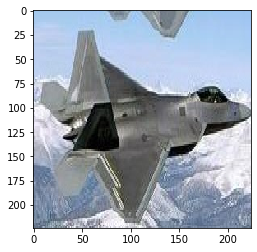

In [22]:
img0 = all_images[0]
plt.imshow(img0)
print(type(img0))

## Criando o modelo

In [9]:
# Parâmetros que vamos utilizar

# Utilizar modelo pré-treinado no ImageNet
weights = 'imagenet'

# Utilizar a rede sem a camada final de classificação
include_top = False

# Indicamos que queremos um average pooling na última camada
pooling = 'avg'

# Shape de entrada.
input_shape=(224, 224, 3)

In [24]:
# keras.applications.resnet.ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
model = VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))

In [11]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [49]:
# # calcula features da primeira imagem
# x = image.img_to_array(img0)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)

# features = model.predict(x)


In [36]:
# calculating to all features
all_features = np.empty(len(all_images), dtype=object)

for i in range(len(all_images)):
    x = image.img_to_array(all_images[i])
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    all_features[i] = features


In [37]:
# printa features da primeira imagem
len(all_features)
pprint(all_features[0])
for a in all_features:
    print(a)

array([[6.39305449e+00, 0.00000000e+00, 5.62931061e+00, 9.82669592e-01,
        3.43933415e+00, 6.01204157e+00, 4.73086119e-01, 5.65292686e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.59733689e+00,
        1.28624706e+01, 0.00000000e+00, 6.47598505e-01, 1.40166292e+01,
        3.38809037e+00, 2.82458309e-02, 0.00000000e+00, 4.68289077e-01,
        1.22984791e+01, 1.10267949e+00, 2.91232371e+00, 4.48310852e+00,
        0.00000000e+00, 1.29089905e-02, 2.70401931e+00, 1.96962376e+01,
        7.98491621e+00, 3.16304708e+00, 3.32725859e+00, 2.59391427e+00,
        1.03250418e+01, 0.00000000e+00, 6.52628565e+00, 2.04711422e-01,
        1.61904693e+00, 1.97399151e+00, 8.63430321e-01, 9.30859923e-01,
        1.86934873e-01, 1.36735547e+00, 5.18288374e+00, 9.82886314e-01,
        2.29084790e-01, 1.70973263e+01, 1.20160294e+01, 6.05271339e-01,
        6.69136107e-01, 2.85826850e+00, 6.55644369e+00, 0.00000000e+00,
        2.68242378e+01, 1.62992549e+00, 7.14095891e-01, 3.900139

  2.35556650e+00 4.40867871e-01 9.03034115e+00 0.00000000e+00]]
[[0.00000000e+00 0.00000000e+00 4.16781098e-01 2.89539218e+00
  1.59047282e+00 7.43396044e-01 1.16056395e+00 6.44886941e-02
  9.35924798e-02 1.50747275e+00 0.00000000e+00 6.80385172e-01
  5.35725880e+00 0.00000000e+00 4.58424032e-01 1.24453688e+00
  0.00000000e+00 3.01470828e+00 0.00000000e+00 4.22239256e+00
  2.86562014e+00 2.83671188e+00 3.24730325e+00 1.85494214e-01
  4.52538073e-01 0.00000000e+00 1.00733080e+01 2.22192311e+00
  9.52875853e-01 2.03214002e+00 2.64801216e+00 1.91839620e-01
  2.48393273e+00 1.02561675e-01 1.57585144e+00 2.21287966e+00
  3.62610847e-01 6.45320845e+00 0.00000000e+00 1.85613930e-02
  9.85214636e-02 4.13489532e+00 3.50309730e+00 7.85513148e-02
  1.89746487e+00 1.15882292e+01 1.80371940e+00 1.78763434e-01
  8.04255676e+00 6.64388478e-01 8.87062073e+00 1.64519668e+00
  1.05743694e+00 0.00000000e+00 6.82584822e-01 1.97240889e-01
  3.85814518e-01 1.19702899e+00 5.68717575e+00 4.85522795e+00
  0.00

[[3.18004274e+00 3.61898780e+00 2.60602701e-02 1.38152695e+01
  1.66703299e-01 3.50245500e+00 1.76147008e+00 3.49064261e-01
  1.66222632e-01 7.62153101e+00 8.16772282e-01 0.00000000e+00
  3.05032516e+00 0.00000000e+00 2.76376362e+01 7.81232774e-01
  3.18902993e+00 2.12190018e+01 4.13128555e-01 9.53131104e+00
  5.64316225e+00 3.26935458e+00 6.53757668e+00 2.18150258e+00
  9.00334001e-01 6.24323797e+00 1.58037782e+00 1.64259872e+01
  1.48547605e-01 9.57530558e-01 2.18151972e-01 7.54969120e-01
  2.12876701e+00 1.47666976e-01 1.83612227e+00 9.53622341e-01
  4.66881573e-01 1.44764805e+01 4.31074888e-01 1.17628412e+01
  2.70842582e-01 2.71979272e-01 8.48889351e-01 2.35043216e+00
  3.18563056e+00 5.74801922e-01 3.76277137e+00 4.35745895e-01
  2.34107447e+00 9.54909611e+00 3.71663451e-01 3.14068532e+00
  3.31328958e-01 0.00000000e+00 1.94661846e+01 1.00172234e+00
  1.10173311e+01 3.30267698e-01 0.00000000e+00 1.21911073e+00
  1.18648589e+00 3.63179135e+00 3.45311093e+00 7.28054571e+00
  1.8970

[[1.28395426e+00 4.55962610e+00 3.86145487e-02 2.38543057e+00
  2.74232507e+00 3.84395456e+00 1.63652337e+00 1.24007963e-01
  3.52950901e-01 6.68833107e-02 0.00000000e+00 0.00000000e+00
  3.98349190e+00 1.10301726e-01 1.42847776e+01 1.73704922e-01
  0.00000000e+00 6.96039820e+00 2.07180679e-01 8.93225670e+00
  2.79817510e+00 1.13847613e+00 6.36162281e+00 3.28793824e-02
  0.00000000e+00 1.44928586e+00 1.02116385e+01 7.59978008e+00
  3.97494406e-01 3.62837702e-01 1.50666595e+00 0.00000000e+00
  2.04071445e+01 0.00000000e+00 5.19451094e+00 5.65134227e-01
  5.64029098e-01 1.28355908e+00 0.00000000e+00 1.86008346e+00
  7.35390377e+00 1.08057901e-01 4.49186707e+00 0.00000000e+00
  1.00675309e+00 0.00000000e+00 4.88460302e-01 7.46472478e-02
  9.06159401e+00 6.44043505e-01 2.21537018e+00 2.40583820e+01
  7.46452093e+00 0.00000000e+00 1.47796278e+01 3.53632236e+00
  1.95891276e-01 2.02605677e+00 1.51755452e-01 8.36867213e-01
  0.00000000e+00 1.26976967e-01 3.63208532e-01 7.62028360e+00
  4.7920

[[4.62111056e-01 9.50776696e-01 8.04880428e+00 4.98478800e-01
  3.25392628e+00 2.25418746e-01 0.00000000e+00 1.95825839e+00
  6.69524145e+00 3.43389654e+00 2.57680535e-01 9.25819054e-02
  3.82258987e+00 2.37685442e+00 2.98788619e+00 1.67795628e-01
  1.79984844e+00 2.53178620e+00 0.00000000e+00 3.56642902e-01
  1.61616611e+00 8.18173945e-01 0.00000000e+00 3.01917338e+00
  2.04980397e+00 0.00000000e+00 0.00000000e+00 9.40604019e+00
  5.00135303e-01 8.03314018e+00 9.49815571e-01 3.64967847e+00
  9.36772406e-01 2.25473142e+00 2.33970761e-01 2.32311815e-01
  4.90800095e+00 9.89810848e+00 0.00000000e+00 1.40877485e+00
  3.09760690e-01 2.18813300e-01 1.97980690e+00 4.68112183e+00
  1.51281571e+00 1.31397753e+01 2.09336162e+00 0.00000000e+00
  5.66245651e+00 1.17885838e+01 1.01528406e+00 0.00000000e+00
  4.84733373e-01 3.16506892e-01 1.23300898e+00 1.72172356e+00
  4.15917206e+00 3.95384967e-01 2.77556896e+00 1.17484784e+00
  1.37748928e+01 3.47208452e+00 7.77209806e+00 3.04151893e+00
  1.7566

[[1.93687633e-01 0.00000000e+00 4.13405371e+00 1.39904344e+00
  3.07408547e+00 4.14073437e-01 3.14236939e-01 0.00000000e+00
  3.92263412e+00 7.37163603e-01 3.20028353e+00 4.38967347e-01
  1.52945662e+00 0.00000000e+00 0.00000000e+00 2.15567040e+00
  2.01272750e+00 3.17190075e+00 1.94255781e+00 8.35262388e-02
  9.46985304e-01 5.02451301e-01 9.74407434e-01 2.45394921e+00
  1.41113961e+00 0.00000000e+00 1.09953678e+00 6.95985854e-01
  1.25717521e-01 1.13783550e+00 2.19967294e+00 3.93699050e+00
  2.05893326e+00 1.58058395e+01 1.36951655e-01 0.00000000e+00
  1.96181118e-01 4.06687593e+00 0.00000000e+00 0.00000000e+00
  5.13646126e+00 2.85914540e+00 4.53159094e+00 1.02976723e+01
  1.02360725e+00 1.02873354e+01 0.00000000e+00 1.19296700e-01
  8.81531596e-01 4.52602096e-02 5.14086342e+00 1.91012889e-01
  1.60705328e+00 5.28584480e-01 4.05756235e-01 8.57230604e-01
  2.08480930e+00 1.90138607e-03 7.51305580e+00 2.98255992e+00
  8.75106049e+00 3.31072664e+00 1.69093594e-01 2.83708930e+00
  0.0000

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [40]:
# Verificando shape e tipo das features da prmeira imagem
print(all_features[0].shape, features.dtype, '\n')

# Mostrando as features.
pprint(features[0])

(1, 512) float32 

array([0.00000000e+00, 0.00000000e+00, 1.89510331e-01, 4.92222346e-02,
       0.00000000e+00, 1.00761645e-01, 1.77894473e-01, 1.54862213e+00,
       3.63722444e+00, 0.00000000e+00, 1.67043400e+01, 0.00000000e+00,
       4.88825649e-01, 0.00000000e+00, 0.00000000e+00, 9.27201509e-01,
       0.00000000e+00, 4.86708954e-02, 6.63413703e-01, 3.46116833e-02,
       1.60651609e-01, 0.00000000e+00, 1.95074514e-01, 6.26931310e-01,
       3.17555881e+00, 7.52642095e-01, 2.34848070e+00, 4.13252413e-02,
       6.85002804e-01, 6.95013627e-02, 0.00000000e+00, 0.00000000e+00,
       6.70430064e-01, 6.40845060e+00, 0.00000000e+00, 2.74868536e+00,
       1.99865669e-01, 3.32195431e-01, 1.56614795e-01, 2.01226875e-01,
       0.00000000e+00, 1.09849238e+00, 1.83943689e-01, 1.44207433e-01,
       4.61237240e+00, 1.66678858e+00, 2.03706115e-01, 8.54271126e+00,
       0.00000000e+00, 9.22499746e-02, 0.00000000e+00, 7.52518401e-02,
       5.82450926e-02, 7.90131390e-01, 0.00000000e+00, 2.0